## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(Augmentation)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')

In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [4]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [5]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [6]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


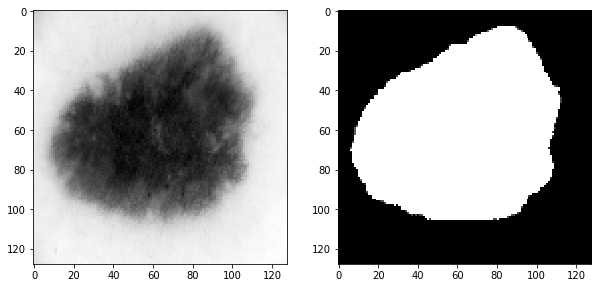

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [13]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [14]:
!pip install medpy
from keras.layers import *
import keras
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from livelossplot.keras import PlotLossesCallback
from medpy.metric import dc, precision, recall
from keras import Model

Using TensorFlow backend.


In [15]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same',kernel_initializer='glorot_uniform')(input_layer)
ba1 = BatchNormalization()(c1)
a1 = Activation('relu')(ba1)
ba2 = BatchNormalization()(a1)
p1 = MaxPooling2D(pool_size=(2,2)) (ba2)

c2 = Conv2D(16, (3,3),  padding='same',kernel_initializer='glorot_uniform')(p1)
bb1 = BatchNormalization()(c2)
a2 = Activation('relu')(bb1)
bb2 = BatchNormalization()(a2)
p2 = MaxPooling2D(pool_size=(2,2)) (bb2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2),kernel_initializer='glorot_uniform')(p2)
bc1 = BatchNormalization()(ct)
add1 = Add()([bb2,bc1])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2),kernel_initializer='glorot_uniform')(add1)
bd1 = BatchNormalization()(ct2)
c3 = Conv2D(1, (3,3),  padding='same',kernel_initializer='glorot_uniform')(bd1)
bd2 = BatchNormalization()(c3)

model = Model(input_layer,bd2)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 8)  32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 8)  0           batch_normalization_1[0][0]      
_____________________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)
b = 32
train_gen = datagen.flow(X_train[:570], y_train[:570], batch_size=b)
val_gen = ImageDataGenerator().flow(X_train[570:], y_train[570:], batch_size=b)

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('5small_Unet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)


In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit_generator(train_gen,
                              validation_data = val_gen,validation_steps = int(np.ceil(150 / float(b))),
                              callbacks=[es,mc], epochs=500, verbose=2,
                              steps_per_epoch=int(np.ceil(570 / float(b))))

Epoch 1/500
 - 3s - loss: 1.0416 - dice_coef: 0.7595 - acc: 0.4339 - val_loss: 3.0784 - val_dice_coef: 1.4561 - val_acc: 0.2074

Epoch 00001: val_loss improved from inf to 3.07842, saving model to 5small_Unet.h5
Epoch 2/500
 - 1s - loss: 0.9299 - dice_coef: 0.9795 - acc: 0.3755 - val_loss: 1.4468 - val_dice_coef: 1.2598 - val_acc: 0.3155

Epoch 00002: val_loss improved from 3.07842 to 1.44685, saving model to 5small_Unet.h5
Epoch 3/500
 - 1s - loss: 0.8750 - dice_coef: 1.0097 - acc: 0.3882 - val_loss: 0.5081 - val_dice_coef: 1.0974 - val_acc: 0.5461

Epoch 00003: val_loss improved from 1.44685 to 0.50814, saving model to 5small_Unet.h5
Epoch 4/500
 - 1s - loss: 0.8042 - dice_coef: 1.0631 - acc: 0.4407 - val_loss: 0.4708 - val_dice_coef: 1.2450 - val_acc: 0.5728

Epoch 00004: val_loss improved from 0.50814 to 0.47083, saving model to 5small_Unet.h5
Epoch 5/500
 - 1s - loss: 0.7490 - dice_coef: 1.1003 - acc: 0.4553 - val_loss: 0.4917 - val_dice_coef: 1.2093 - val_acc: 0.5455

Epoch 00005


Epoch 00043: val_loss did not improve from 0.15294
Epoch 44/500
 - 1s - loss: 0.1886 - dice_coef: 0.6280 - acc: 0.7811 - val_loss: 0.1692 - val_dice_coef: 0.6599 - val_acc: 0.8059

Epoch 00044: val_loss did not improve from 0.15294
Epoch 45/500
 - 1s - loss: 0.1905 - dice_coef: 0.6110 - acc: 0.7776 - val_loss: 0.1564 - val_dice_coef: 0.6443 - val_acc: 0.8173

Epoch 00045: val_loss did not improve from 0.15294
Epoch 46/500
 - 1s - loss: 0.1816 - dice_coef: 0.6149 - acc: 0.7858 - val_loss: 0.1582 - val_dice_coef: 0.7232 - val_acc: 0.8221

Epoch 00046: val_loss did not improve from 0.15294
Epoch 47/500
 - 1s - loss: 0.1786 - dice_coef: 0.6076 - acc: 0.7846 - val_loss: 0.1546 - val_dice_coef: 0.6847 - val_acc: 0.8217

Epoch 00047: val_loss did not improve from 0.15294
Epoch 48/500
 - 1s - loss: 0.1748 - dice_coef: 0.6038 - acc: 0.7862 - val_loss: 0.1568 - val_dice_coef: 0.7003 - val_acc: 0.8167

Epoch 00048: val_loss did not improve from 0.15294
Epoch 49/500
 - 1s - loss: 0.1716 - dice_co

 - 1s - loss: 0.1424 - dice_coef: 0.4789 - acc: 0.7975 - val_loss: 0.1300 - val_dice_coef: 0.5032 - val_acc: 0.8296

Epoch 00086: val_loss did not improve from 0.12497
Epoch 87/500
 - 1s - loss: 0.1436 - dice_coef: 0.4725 - acc: 0.7982 - val_loss: 0.1290 - val_dice_coef: 0.5014 - val_acc: 0.8279

Epoch 00087: val_loss did not improve from 0.12497
Epoch 88/500
 - 1s - loss: 0.1413 - dice_coef: 0.4765 - acc: 0.8014 - val_loss: 0.1254 - val_dice_coef: 0.5222 - val_acc: 0.8322

Epoch 00088: val_loss did not improve from 0.12497
Epoch 89/500
 - 1s - loss: 0.1438 - dice_coef: 0.4721 - acc: 0.7977 - val_loss: 0.1229 - val_dice_coef: 0.5467 - val_acc: 0.8333

Epoch 00089: val_loss improved from 0.12497 to 0.12290, saving model to 5small_Unet.h5
Epoch 90/500
 - 1s - loss: 0.1436 - dice_coef: 0.4706 - acc: 0.7985 - val_loss: 0.1253 - val_dice_coef: 0.5295 - val_acc: 0.8286

Epoch 00090: val_loss did not improve from 0.12290
Epoch 91/500
 - 1s - loss: 0.1425 - dice_coef: 0.4713 - acc: 0.8004 - va

 - 1s - loss: 0.1424 - dice_coef: 0.4599 - acc: 0.7994 - val_loss: 0.1301 - val_dice_coef: 0.4944 - val_acc: 0.8264

Epoch 00131: val_loss did not improve from 0.12290
Epoch 132/500
 - 1s - loss: 0.1414 - dice_coef: 0.4612 - acc: 0.7998 - val_loss: 0.1241 - val_dice_coef: 0.5309 - val_acc: 0.8292

Epoch 00132: val_loss did not improve from 0.12290
Epoch 133/500
 - 1s - loss: 0.1402 - dice_coef: 0.4631 - acc: 0.8029 - val_loss: 0.1299 - val_dice_coef: 0.4878 - val_acc: 0.8201

Epoch 00133: val_loss did not improve from 0.12290
Epoch 134/500
 - 1s - loss: 0.1396 - dice_coef: 0.4644 - acc: 0.8032 - val_loss: 0.1325 - val_dice_coef: 0.4787 - val_acc: 0.8208

Epoch 00134: val_loss did not improve from 0.12290
Epoch 135/500
 - 1s - loss: 0.1394 - dice_coef: 0.4643 - acc: 0.8040 - val_loss: 0.1261 - val_dice_coef: 0.5015 - val_acc: 0.8293

Epoch 00135: val_loss did not improve from 0.12290
Epoch 136/500
 - 1s - loss: 0.1402 - dice_coef: 0.4636 - acc: 0.8030 - val_loss: 0.1251 - val_dice_coef:

In [0]:
model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 555us/step


[0.13170277674992878, 0.5109780669212342, 0.8185899509323968]

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(139)

/home/student/Documents/ActiveNeuron/Keras/FCNN_Segment/Segmentation_datasets/Skin_Cancer/DATA


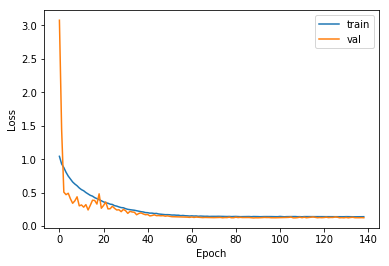

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
print(os.getcwd())
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

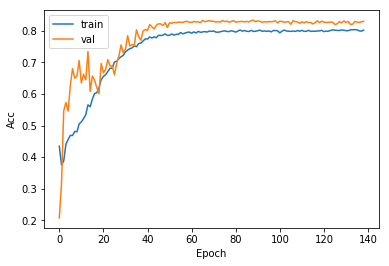

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_Aug/Weights/5small_Unet.h5')

In [0]:
a = np.reshape(X_test[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

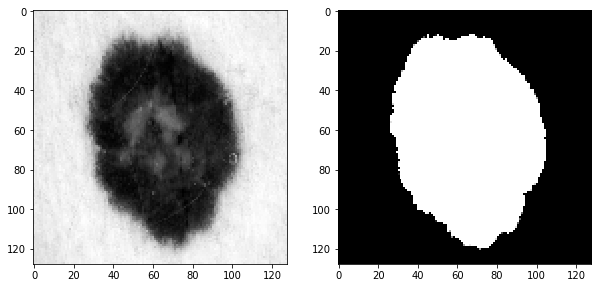

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.22568917
1.1520265


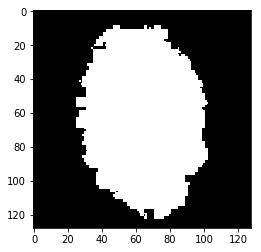

In [21]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

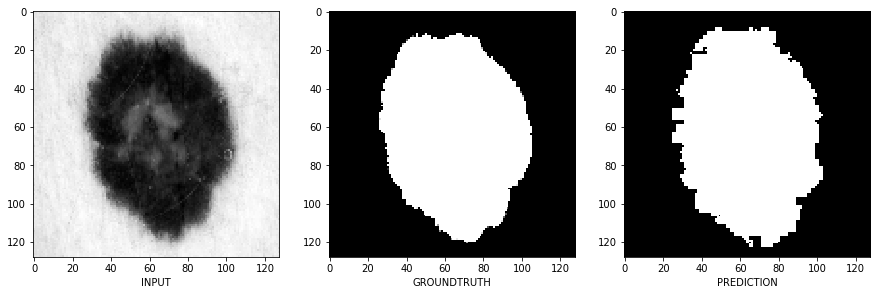

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [23]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.744814378081498
Train pre: 0.883201951951952
Train re: 0.6439195938641744


In [24]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.5737462374368655
Test pre: 0.8388781142771893
Test re: 0.43595906342068536
